In [2]:
import requests
import pprint
import json
import pickle
import numpy as np
import seaborn as sns 
import math
import pandas as pd
import operator

login = {
    'username': 'dimensionsAPI@URMC.Rochester.edu',
    'password': 'Rochester&/()API'
}
resp = requests.post('https://app.dimensions.ai/api/auth.json', json=login)
resp.raise_for_status()
headers = {'Authorization': "JWT " + resp.json()['token']}

In [31]:
with open ('schools', 'rb') as fp:
    schools = pickle.load(fp)    
schoolsT=str(json.dumps(schools))
with open ('menu', 'rb') as fp:
    menu = pickle.load(fp)

##### Collecting data of Grants

In [4]:
def takegrants(FOR=1):
    if len(str(FOR))==1:
        FOR='0'+str(FOR)
    else:
        FOR=str(FOR)
    grants=[]
    ids=[]
    years=[]
    orgs=[]
    resp = requests.post(
                'https://app.dimensions.ai/api/dsl.json',
                data='search grants where funding_usd is not empty and FOR_first.name="'+FOR+menu[FOR]+'" \
                and research_orgs.name in '+schoolsT+' and active_year >=1998 return grants[id]',
                headers=headers)
    j=resp.json()
    print("number of grants in "+FOR+" is "+str(j["_stats"]["total_count"]))

    ite=j["_stats"]["total_count"]//1000

    for i in range(49):
        if i>ite:
            break
        resp = requests.post(
                'https://app.dimensions.ai/api/dsl.json',
                data='search grants where funding_usd is not empty and FOR_first.name="'+FOR+menu[FOR]+'" \
                and research_orgs.name in '+schoolsT+' and active_year>=1998 \
                return grants[funding_usd+id+active_year+research_orgs+title] \
                sort by funding_usd desc limit 1000 skip '+str(i*1000),
                headers=headers)
        j=resp.json()
        for jj in j["grants"]:
            grants.append(jj['funding_usd'])
            ids.append(jj["id"])
            orgs.append(jj["research_orgs"])
            if "active_year" not in jj.keys():
                years.append([])
            else:
                years.append(jj["active_year"])
        print("length of grants, ids, years, orgs are ", len(grants), len(ids), len(years), len(orgs))
                 
    if ite>=50:
        rest=(j["_stats"]["total_count"]-50000)//1000
        restrest=(j["_stats"]["total_count"]-50000)%1000
        rgrants=[]
        rids=[]
        ryears=[]
        rorgs=[]
        for i in range(rest):
            resp = requests.post(
                'https://app.dimensions.ai/api/dsl.json',
                data='search grants where funding_usd is not empty and FOR_first.name="'+FOR+menu[FOR]+'" \
                and research_orgs.name in '+schoolsT+' and active_year>=1998 \
                return grants[funding_usd+id+active_year+research_orgs+title] \
                sort by funding_usd asc limit 1000 skip '+str(i*1000),
                headers=headers)
            j=resp.json()
            for jj in j["grants"]:
                rgrants.append(jj['funding_usd'])
                rids.append(jj["id"])
                rorgs.append(jj["research_orgs"])
                if "active_year" not in jj.keys():
                    ryears.append([])
                else:
                    ryears.append(jj["active_year"])
        
        resp = requests.post(
                'https://app.dimensions.ai/api/dsl.json',
                data='search grants where funding_usd is not empty and FOR_first.name="'+FOR+menu[FOR]+'"\
                and research_orgs.name in '+schoolsT+' and active_year>=1998 \
                return grants[funding_usd+id+active_year+research_orgs+title] \
                sort by funding_usd asc limit '+str(restrest)+' skip '+str(rest*1000),
                headers=headers)
        j=resp.json()
        for jj in j["grants"]:
            rgrants.append(jj['funding_usd'])
            rids.append(jj["id"])
            rorgs.append(jj["research_orgs"])
            if "active_year" not in jj.keys():
                ryears.append([])
            else:
                ryears.append(jj["active_year"])           
        rgrants.reverse()
        rids.reverse()
        ryears.reverse()
        rorgs.reverse()
        
        grants.extend(rgrants)
        ids.extend(rids)
        years.extend(ryears)
        orgs.extend(rorgs)
        
        print("length of grants, ids, years, orgs are ", len(grants), len(ids), len(years), len(orgs))
    
    return grants, ids, years, orgs

In [191]:
Grants={}
for i in range(1,23):
    [grants, ids, years, orgs]=takegrants(i)
    d={"grants":grants, "ids":ids,"years":years,"orgs":orgs}
    df=pd.DataFrame(data=d)
    Grants[i]=df
with open('Grants', 'wb') as f:
    pickle.dump(Grants, f)

number of grants in 06 is 68572
length of grants, ids, years, orgs are  1000 1000 1000 1000
length of grants, ids, years, orgs are  2000 2000 2000 2000
length of grants, ids, years, orgs are  3000 3000 3000 3000
length of grants, ids, years, orgs are  4000 4000 4000 4000
length of grants, ids, years, orgs are  5000 5000 5000 5000
length of grants, ids, years, orgs are  6000 6000 6000 6000
length of grants, ids, years, orgs are  7000 7000 7000 7000
length of grants, ids, years, orgs are  8000 8000 8000 8000
length of grants, ids, years, orgs are  9000 9000 9000 9000
length of grants, ids, years, orgs are  10000 10000 10000 10000
length of grants, ids, years, orgs are  11000 11000 11000 11000
length of grants, ids, years, orgs are  12000 12000 12000 12000
length of grants, ids, years, orgs are  13000 13000 13000 13000
length of grants, ids, years, orgs are  14000 14000 14000 14000
length of grants, ids, years, orgs are  15000 15000 15000 15000
length of grants, ids, years, orgs are  1600

length of grants, ids, years, orgs are  16000 16000 16000 16000
length of grants, ids, years, orgs are  17000 17000 17000 17000
length of grants, ids, years, orgs are  18000 18000 18000 18000
length of grants, ids, years, orgs are  19000 19000 19000 19000
length of grants, ids, years, orgs are  20000 20000 20000 20000
length of grants, ids, years, orgs are  21000 21000 21000 21000
length of grants, ids, years, orgs are  22000 22000 22000 22000
length of grants, ids, years, orgs are  23000 23000 23000 23000
length of grants, ids, years, orgs are  24000 24000 24000 24000
length of grants, ids, years, orgs are  25000 25000 25000 25000
length of grants, ids, years, orgs are  26000 26000 26000 26000
length of grants, ids, years, orgs are  27000 27000 27000 27000
length of grants, ids, years, orgs are  28000 28000 28000 28000
length of grants, ids, years, orgs are  29000 29000 29000 29000
length of grants, ids, years, orgs are  30000 30000 30000 30000
length of grants, ids, years, orgs are  

##### Eliminate Zero Dollar Grants

In [5]:
with open ('Grants', 'rb') as fp:
    Grants = pickle.load(fp)
for i in range(1,23):
    Grants[i]=Grants[i].loc[Grants[i]['grants'] >0]

##### Collecting Data of Resulting Papers

In [42]:
import time
def takepapers(FOR):
    paperids=[]
    orgs=[]
    grantids=[]
    ite=len(Grants[FOR])//500
    print(ite,"*500 grants")
    for itee in range(ite):
        if (itee%10)==0:
            time.sleep(10)
        print(itee,"/",ite)
        for i in ["<=2012", ">2012"]:
            resp = requests.post(
                    'https://app.dimensions.ai/api/dsl.json',data='search publications \
                    where year '+i+' and supporting_grant_ids in '+ json.dumps(list(Grants[FOR]["ids"][itee*500:(itee+1)*500])) +' \
                    return publications[id+research_orgs+supporting_grant_ids]',
                    headers=headers)
            j=resp.json()
            iittee=j["_stats"]["total_count"]//1000
            for iitteee in range(50):
                print(iitteee,"/",iittee,"/",itee,"/",ite)
                if iitteee>iittee:
                    break
                resp = requests.post(
                    'https://app.dimensions.ai/api/dsl.json',data='search publications \
                    where year '+i+' and supporting_grant_ids in '+ json.dumps(list(Grants[FOR]["ids"][itee*500:(itee+1)*500])) +' \
                    return publications[id+research_orgs+supporting_grant_ids] \
                    sort by id asc limit 1000 skip '+str(iitteee*1000),
                    headers=headers)
                j=resp.json()
                for paper in j['publications']:
                    paperids.append(paper['id'])
                    grantids.append(paper['supporting_grant_ids'])
                    if 'research_orgs' in paper.keys():
                        org_list=[]
                        for org in paper['research_orgs']:
                            org_list.append(org['name'])
                        orgs.append(org_list)
                    else:
                        orgs.append([])


            if iittee>=50:
                rpaperids=[]
                rorgs=[]
                rgrantids=[]
                rest=(j["_stats"]["total_count"]-50000)//1000
                restrest=(j["_stats"]["total_count"]-50000)%1000
                for reste in range(rest):
                    print("inverse",reste,"time", ite, "times")
                    resp = requests.post(
                    'https://app.dimensions.ai/api/dsl.json',data='search publications \
                    where year '+i+' and supporting_grant_ids in '+ json.dumps(list(Grants[FOR]["ids"][itee*500:(itee+1)*500])) +' \
                    return publications[id+research_orgs+supporting_grant_ids] \
                    sort by id desc limit 1000 skip '+str(reste*1000),
                    headers=headers)
                    j=resp.json()
                    for paper in j['publications']:
                        rpaperids.append(paper['id'])
                        rgrantids.append(paper['supporting_grant_ids'])
                        if 'research_orgs' in paper.keys():
                            org_list=[]
                            for org in paper['research_orgs']:
                                org_list.append(org['name'])
                            rorgs.append(org_list)
                        else:
                            rorgs.append([])

                resp = requests.post(
                    'https://app.dimensions.ai/api/dsl.json',data='search publications \
                    where year '+i+' and supporting_grant_ids in '+ json.dumps(list(Grants[FOR]["ids"][itee*500:(itee+1)*500])) +' \
                    return publications[id+research_orgs+supporting_grant_ids] \
                    sort by id desc limit '+str(restrest)+' skip '+str(rest*1000),
                    headers=headers)
                j=resp.json()
                for paper in j['publications']:
                    rpaperids.append(paper['id'])
                    rgrantids.append(paper['supporting_grant_ids'])
                    if 'research_orgs' in paper.keys():
                        org_list=[]
                        for org in paper['research_orgs']:
                            org_list.append(org['name'])
                        rorgs.append(org_list)
                    else:
                        rorgs.append([])



                rpaperids.reverse()
                rorgs.reverse()
                rgrantids.reverse()

                paperids.extend(rpaperids)
                orgs.extend(rorgs)
                grantids.extend(rgrantids)

        print("-------------length of papers, orgs and grants", len(paperids), len(orgs), len(grantids),"--------------")         
    return paperids, orgs, grantids              

In [44]:
Papers={}
for i in range(6,23):
    print("-------------------------------------FOR",i,"---------------------------------------------")
    [paperids, orgs, grantids]=takepapers(i)
    d={"paperid":paperids, "orgs":orgs,"grantids":grantids}
    df=pd.DataFrame(data=d)
    Papers[i]=df
with open('Papers', 'wb') as f:
    pickle.dump(Papers, f)

-------------------------------------FOR 6 ---------------------------------------------
129 *500 grants
0 / 129
0 / 53 / 0 / 129
1 / 53 / 0 / 129
2 / 53 / 0 / 129
3 / 53 / 0 / 129
4 / 53 / 0 / 129
5 / 53 / 0 / 129
6 / 53 / 0 / 129
7 / 53 / 0 / 129
8 / 53 / 0 / 129
9 / 53 / 0 / 129
10 / 53 / 0 / 129
11 / 53 / 0 / 129
12 / 53 / 0 / 129
13 / 53 / 0 / 129
14 / 53 / 0 / 129
15 / 53 / 0 / 129
16 / 53 / 0 / 129
17 / 53 / 0 / 129
18 / 53 / 0 / 129
19 / 53 / 0 / 129
20 / 53 / 0 / 129
21 / 53 / 0 / 129
22 / 53 / 0 / 129
23 / 53 / 0 / 129
24 / 53 / 0 / 129
25 / 53 / 0 / 129
26 / 53 / 0 / 129
27 / 53 / 0 / 129
28 / 53 / 0 / 129
29 / 53 / 0 / 129
30 / 53 / 0 / 129
31 / 53 / 0 / 129
32 / 53 / 0 / 129
33 / 53 / 0 / 129
34 / 53 / 0 / 129
35 / 53 / 0 / 129
36 / 53 / 0 / 129
37 / 53 / 0 / 129
38 / 53 / 0 / 129
39 / 53 / 0 / 129
40 / 53 / 0 / 129
41 / 53 / 0 / 129
42 / 53 / 0 / 129
43 / 53 / 0 / 129
44 / 53 / 0 / 129
45 / 53 / 0 / 129
46 / 53 / 0 / 129
47 / 53 / 0 / 129
48 / 53 / 0 / 129
49 / 53 / 0 / 1

0 / 11 / 12 / 129
1 / 11 / 12 / 129
2 / 11 / 12 / 129
3 / 11 / 12 / 129
4 / 11 / 12 / 129
5 / 11 / 12 / 129
6 / 11 / 12 / 129
7 / 11 / 12 / 129
8 / 11 / 12 / 129
9 / 11 / 12 / 129
10 / 11 / 12 / 129
11 / 11 / 12 / 129
12 / 11 / 12 / 129
0 / 5 / 12 / 129
1 / 5 / 12 / 129
2 / 5 / 12 / 129
3 / 5 / 12 / 129
4 / 5 / 12 / 129
5 / 5 / 12 / 129
6 / 5 / 12 / 129
-------------length of papers, orgs and grants 384182 384182 384182 --------------
13 / 129
0 / 9 / 13 / 129
1 / 9 / 13 / 129
2 / 9 / 13 / 129
3 / 9 / 13 / 129
4 / 9 / 13 / 129
5 / 9 / 13 / 129
6 / 9 / 13 / 129
7 / 9 / 13 / 129
8 / 9 / 13 / 129
9 / 9 / 13 / 129
10 / 9 / 13 / 129
0 / 5 / 13 / 129
1 / 5 / 13 / 129
2 / 5 / 13 / 129
3 / 5 / 13 / 129
4 / 5 / 13 / 129
5 / 5 / 13 / 129
6 / 5 / 13 / 129
-------------length of papers, orgs and grants 398986 398986 398986 --------------
14 / 129
0 / 9 / 14 / 129
1 / 9 / 14 / 129
2 / 9 / 14 / 129
3 / 9 / 14 / 129
4 / 9 / 14 / 129
5 / 9 / 14 / 129
6 / 9 / 14 / 129
7 / 9 / 14 / 129
8 / 9 / 14 / 129


40 / 129
0 / 3 / 40 / 129
1 / 3 / 40 / 129
2 / 3 / 40 / 129
3 / 3 / 40 / 129
4 / 3 / 40 / 129
0 / 1 / 40 / 129
1 / 1 / 40 / 129
2 / 1 / 40 / 129
-------------length of papers, orgs and grants 618519 618519 618519 --------------
41 / 129
0 / 3 / 41 / 129
1 / 3 / 41 / 129
2 / 3 / 41 / 129
3 / 3 / 41 / 129
4 / 3 / 41 / 129
0 / 1 / 41 / 129
1 / 1 / 41 / 129
2 / 1 / 41 / 129
-------------length of papers, orgs and grants 624092 624092 624092 --------------
42 / 129
0 / 2 / 42 / 129
1 / 2 / 42 / 129
2 / 2 / 42 / 129
3 / 2 / 42 / 129
0 / 1 / 42 / 129
1 / 1 / 42 / 129
2 / 1 / 42 / 129
-------------length of papers, orgs and grants 628668 628668 628668 --------------
43 / 129
0 / 2 / 43 / 129
1 / 2 / 43 / 129
2 / 2 / 43 / 129
3 / 2 / 43 / 129
0 / 1 / 43 / 129
1 / 1 / 43 / 129
2 / 1 / 43 / 129
-------------length of papers, orgs and grants 633427 633427 633427 --------------
44 / 129
0 / 2 / 44 / 129
1 / 2 / 44 / 129
2 / 2 / 44 / 129
3 / 2 / 44 / 129
0 / 2 / 44 / 129
1 / 2 / 44 / 129
2 / 2 / 44 

0 / 1 / 82 / 129
1 / 1 / 82 / 129
2 / 1 / 82 / 129
0 / 0 / 82 / 129
1 / 0 / 82 / 129
-------------length of papers, orgs and grants 752745 752745 752745 --------------
83 / 129
0 / 1 / 83 / 129
1 / 1 / 83 / 129
2 / 1 / 83 / 129
0 / 0 / 83 / 129
1 / 0 / 83 / 129
-------------length of papers, orgs and grants 754889 754889 754889 --------------
84 / 129
0 / 1 / 84 / 129
1 / 1 / 84 / 129
2 / 1 / 84 / 129
0 / 0 / 84 / 129
1 / 0 / 84 / 129
-------------length of papers, orgs and grants 757145 757145 757145 --------------
85 / 129
0 / 1 / 85 / 129
1 / 1 / 85 / 129
2 / 1 / 85 / 129
0 / 0 / 85 / 129
1 / 0 / 85 / 129
-------------length of papers, orgs and grants 759674 759674 759674 --------------
86 / 129
0 / 1 / 86 / 129
1 / 1 / 86 / 129
2 / 1 / 86 / 129
0 / 0 / 86 / 129
1 / 0 / 86 / 129
-------------length of papers, orgs and grants 761976 761976 761976 --------------
87 / 129
0 / 1 / 87 / 129
1 / 1 / 87 / 129
2 / 1 / 87 / 129
0 / 0 / 87 / 129
1 / 0 / 87 / 129
-------------length of papers,

1 / 0 / 1 / 3
0 / 0 / 1 / 3
1 / 0 / 1 / 3
-------------length of papers, orgs and grants 5047 5047 5047 --------------
2 / 3
0 / 0 / 2 / 3
1 / 0 / 2 / 3
0 / 0 / 2 / 3
1 / 0 / 2 / 3
-------------length of papers, orgs and grants 5589 5589 5589 --------------
-------------------------------------FOR 8 ---------------------------------------------
57 *500 grants
0 / 57
0 / 20 / 0 / 57
1 / 20 / 0 / 57
2 / 20 / 0 / 57
3 / 20 / 0 / 57
4 / 20 / 0 / 57
5 / 20 / 0 / 57
6 / 20 / 0 / 57
7 / 20 / 0 / 57
8 / 20 / 0 / 57
9 / 20 / 0 / 57
10 / 20 / 0 / 57
11 / 20 / 0 / 57
12 / 20 / 0 / 57
13 / 20 / 0 / 57
14 / 20 / 0 / 57
15 / 20 / 0 / 57
16 / 20 / 0 / 57
17 / 20 / 0 / 57
18 / 20 / 0 / 57
19 / 20 / 0 / 57
20 / 20 / 0 / 57
21 / 20 / 0 / 57
0 / 29 / 0 / 57
1 / 29 / 0 / 57
2 / 29 / 0 / 57
3 / 29 / 0 / 57
4 / 29 / 0 / 57
5 / 29 / 0 / 57
6 / 29 / 0 / 57
7 / 29 / 0 / 57
8 / 29 / 0 / 57
9 / 29 / 0 / 57
10 / 29 / 0 / 57
11 / 29 / 0 / 57
12 / 29 / 0 / 57
13 / 29 / 0 / 57
14 / 29 / 0 / 57
15 / 29 / 0 / 57
16 / 

1 / 0 / 37 / 57
0 / 0 / 37 / 57
1 / 0 / 37 / 57
-------------length of papers, orgs and grants 171832 171832 171832 --------------
38 / 57
0 / 0 / 38 / 57
1 / 0 / 38 / 57
0 / 0 / 38 / 57
1 / 0 / 38 / 57
-------------length of papers, orgs and grants 173445 173445 173445 --------------
39 / 57
0 / 0 / 39 / 57
1 / 0 / 39 / 57
0 / 0 / 39 / 57
1 / 0 / 39 / 57
-------------length of papers, orgs and grants 174720 174720 174720 --------------
40 / 57
0 / 0 / 40 / 57
1 / 0 / 40 / 57
0 / 0 / 40 / 57
1 / 0 / 40 / 57
-------------length of papers, orgs and grants 176171 176171 176171 --------------
41 / 57
0 / 0 / 41 / 57
1 / 0 / 41 / 57
0 / 0 / 41 / 57
1 / 0 / 41 / 57
-------------length of papers, orgs and grants 177672 177672 177672 --------------
42 / 57
0 / 0 / 42 / 57
1 / 0 / 42 / 57
0 / 0 / 42 / 57
1 / 0 / 42 / 57
-------------length of papers, orgs and grants 178878 178878 178878 --------------
43 / 57
0 / 0 / 43 / 57
1 / 0 / 43 / 57
0 / 0 / 43 / 57
1 / 0 / 43 / 57
-------------length of

1 / 1 / 24 / 50
2 / 1 / 24 / 50
-------------length of papers, orgs and grants 113999 113999 113999 --------------
25 / 50
0 / 0 / 25 / 50
1 / 0 / 25 / 50
0 / 1 / 25 / 50
1 / 1 / 25 / 50
2 / 1 / 25 / 50
-------------length of papers, orgs and grants 116228 116228 116228 --------------
26 / 50
0 / 0 / 26 / 50
1 / 0 / 26 / 50
0 / 1 / 26 / 50
1 / 1 / 26 / 50
2 / 1 / 26 / 50
-------------length of papers, orgs and grants 118183 118183 118183 --------------
27 / 50
0 / 1 / 27 / 50
1 / 1 / 27 / 50
2 / 1 / 27 / 50
0 / 0 / 27 / 50
1 / 0 / 27 / 50
-------------length of papers, orgs and grants 120186 120186 120186 --------------
28 / 50
0 / 0 / 28 / 50
1 / 0 / 28 / 50
0 / 1 / 28 / 50
1 / 1 / 28 / 50
2 / 1 / 28 / 50
-------------length of papers, orgs and grants 122057 122057 122057 --------------
29 / 50
0 / 0 / 29 / 50
1 / 0 / 29 / 50
0 / 0 / 29 / 50
1 / 0 / 29 / 50
-------------length of papers, orgs and grants 123919 123919 123919 --------------
30 / 50
0 / 0 / 30 / 50
1 / 0 / 30 / 50
0 / 0 

17 / 79 / 0 / 183
18 / 79 / 0 / 183
19 / 79 / 0 / 183
20 / 79 / 0 / 183
21 / 79 / 0 / 183
22 / 79 / 0 / 183
23 / 79 / 0 / 183
24 / 79 / 0 / 183
25 / 79 / 0 / 183
26 / 79 / 0 / 183
27 / 79 / 0 / 183
28 / 79 / 0 / 183
29 / 79 / 0 / 183
30 / 79 / 0 / 183
31 / 79 / 0 / 183
32 / 79 / 0 / 183
33 / 79 / 0 / 183
34 / 79 / 0 / 183
35 / 79 / 0 / 183
36 / 79 / 0 / 183
37 / 79 / 0 / 183
38 / 79 / 0 / 183
39 / 79 / 0 / 183
40 / 79 / 0 / 183
41 / 79 / 0 / 183
42 / 79 / 0 / 183
43 / 79 / 0 / 183
44 / 79 / 0 / 183
45 / 79 / 0 / 183
46 / 79 / 0 / 183
47 / 79 / 0 / 183
48 / 79 / 0 / 183
49 / 79 / 0 / 183
inverse 0 time 183 times
inverse 1 time 183 times
inverse 2 time 183 times
inverse 3 time 183 times
inverse 4 time 183 times
inverse 5 time 183 times
inverse 6 time 183 times
inverse 7 time 183 times
inverse 8 time 183 times
inverse 9 time 183 times
inverse 10 time 183 times
inverse 11 time 183 times
inverse 12 time 183 times
inverse 13 time 183 times
inverse 14 time 183 times
inverse 15 time 183 times


12 / 15 / 9 / 183
13 / 15 / 9 / 183
14 / 15 / 9 / 183
15 / 15 / 9 / 183
16 / 15 / 9 / 183
0 / 9 / 9 / 183
1 / 9 / 9 / 183
2 / 9 / 9 / 183
3 / 9 / 9 / 183
4 / 9 / 9 / 183
5 / 9 / 9 / 183
6 / 9 / 9 / 183
7 / 9 / 9 / 183
8 / 9 / 9 / 183
9 / 9 / 9 / 183
10 / 9 / 9 / 183
-------------length of papers, orgs and grants 496723 496723 496723 --------------
10 / 183
0 / 13 / 10 / 183
1 / 13 / 10 / 183
2 / 13 / 10 / 183
3 / 13 / 10 / 183
4 / 13 / 10 / 183
5 / 13 / 10 / 183
6 / 13 / 10 / 183
7 / 13 / 10 / 183
8 / 13 / 10 / 183
9 / 13 / 10 / 183
10 / 13 / 10 / 183
11 / 13 / 10 / 183
12 / 13 / 10 / 183
13 / 13 / 10 / 183
14 / 13 / 10 / 183
0 / 13 / 10 / 183
1 / 13 / 10 / 183
2 / 13 / 10 / 183
3 / 13 / 10 / 183
4 / 13 / 10 / 183
5 / 13 / 10 / 183
6 / 13 / 10 / 183
7 / 13 / 10 / 183
8 / 13 / 10 / 183
9 / 13 / 10 / 183
10 / 13 / 10 / 183
11 / 13 / 10 / 183
12 / 13 / 10 / 183
13 / 13 / 10 / 183
14 / 13 / 10 / 183
-------------length of papers, orgs and grants 523454 523454 523454 --------------
11 / 183

30 / 183
0 / 4 / 30 / 183
1 / 4 / 30 / 183
2 / 4 / 30 / 183
3 / 4 / 30 / 183
4 / 4 / 30 / 183
5 / 4 / 30 / 183
0 / 5 / 30 / 183
1 / 5 / 30 / 183
2 / 5 / 30 / 183
3 / 5 / 30 / 183
4 / 5 / 30 / 183
5 / 5 / 30 / 183
6 / 5 / 30 / 183
-------------length of papers, orgs and grants 799647 799647 799647 --------------
31 / 183
0 / 5 / 31 / 183
1 / 5 / 31 / 183
2 / 5 / 31 / 183
3 / 5 / 31 / 183
4 / 5 / 31 / 183
5 / 5 / 31 / 183
6 / 5 / 31 / 183
0 / 5 / 31 / 183
1 / 5 / 31 / 183
2 / 5 / 31 / 183
3 / 5 / 31 / 183
4 / 5 / 31 / 183
5 / 5 / 31 / 183
6 / 5 / 31 / 183
-------------length of papers, orgs and grants 810093 810093 810093 --------------
32 / 183
0 / 4 / 32 / 183
1 / 4 / 32 / 183
2 / 4 / 32 / 183
3 / 4 / 32 / 183
4 / 4 / 32 / 183
5 / 4 / 32 / 183
0 / 4 / 32 / 183
1 / 4 / 32 / 183
2 / 4 / 32 / 183
3 / 4 / 32 / 183
4 / 4 / 32 / 183
5 / 4 / 32 / 183
-------------length of papers, orgs and grants 819631 819631 819631 --------------
33 / 183
0 / 3 / 33 / 183
1 / 3 / 33 / 183
2 / 3 / 33 / 183
3

60 / 183
0 / 3 / 60 / 183
1 / 3 / 60 / 183
2 / 3 / 60 / 183
3 / 3 / 60 / 183
4 / 3 / 60 / 183
0 / 2 / 60 / 183
1 / 2 / 60 / 183
2 / 2 / 60 / 183
3 / 2 / 60 / 183
-------------length of papers, orgs and grants 1025966 1025966 1025966 --------------
61 / 183
0 / 3 / 61 / 183
1 / 3 / 61 / 183
2 / 3 / 61 / 183
3 / 3 / 61 / 183
4 / 3 / 61 / 183
0 / 2 / 61 / 183
1 / 2 / 61 / 183
2 / 2 / 61 / 183
3 / 2 / 61 / 183
-------------length of papers, orgs and grants 1032671 1032671 1032671 --------------
62 / 183
0 / 3 / 62 / 183
1 / 3 / 62 / 183
2 / 3 / 62 / 183
3 / 3 / 62 / 183
4 / 3 / 62 / 183
0 / 2 / 62 / 183
1 / 2 / 62 / 183
2 / 2 / 62 / 183
3 / 2 / 62 / 183
-------------length of papers, orgs and grants 1038228 1038228 1038228 --------------
63 / 183
0 / 2 / 63 / 183
1 / 2 / 63 / 183
2 / 2 / 63 / 183
3 / 2 / 63 / 183
0 / 1 / 63 / 183
1 / 1 / 63 / 183
2 / 1 / 63 / 183
-------------length of papers, orgs and grants 1043018 1043018 1043018 --------------
64 / 183
0 / 3 / 64 / 183
1 / 3 / 64 / 183

0 / 1 / 96 / 183
1 / 1 / 96 / 183
2 / 1 / 96 / 183
0 / 1 / 96 / 183
1 / 1 / 96 / 183
2 / 1 / 96 / 183
-------------length of papers, orgs and grants 1194296 1194296 1194296 --------------
97 / 183
0 / 1 / 97 / 183
1 / 1 / 97 / 183
2 / 1 / 97 / 183
0 / 1 / 97 / 183
1 / 1 / 97 / 183
2 / 1 / 97 / 183
-------------length of papers, orgs and grants 1197068 1197068 1197068 --------------
98 / 183
0 / 1 / 98 / 183
1 / 1 / 98 / 183
2 / 1 / 98 / 183
0 / 1 / 98 / 183
1 / 1 / 98 / 183
2 / 1 / 98 / 183
-------------length of papers, orgs and grants 1199715 1199715 1199715 --------------
99 / 183
0 / 0 / 99 / 183
1 / 0 / 99 / 183
0 / 0 / 99 / 183
1 / 0 / 99 / 183
-------------length of papers, orgs and grants 1201301 1201301 1201301 --------------
100 / 183
0 / 0 / 100 / 183
1 / 0 / 100 / 183
0 / 1 / 100 / 183
1 / 1 / 100 / 183
2 / 1 / 100 / 183
-------------length of papers, orgs and grants 1203528 1203528 1203528 --------------
101 / 183
0 / 1 / 101 / 183
1 / 1 / 101 / 183
2 / 1 / 101 / 183
0 / 2

0 / 0 / 139 / 183
1 / 0 / 139 / 183
0 / 0 / 139 / 183
1 / 0 / 139 / 183
-------------length of papers, orgs and grants 1293506 1293506 1293506 --------------
140 / 183
0 / 0 / 140 / 183
1 / 0 / 140 / 183
0 / 0 / 140 / 183
1 / 0 / 140 / 183
-------------length of papers, orgs and grants 1295238 1295238 1295238 --------------
141 / 183
0 / 0 / 141 / 183
1 / 0 / 141 / 183
0 / 0 / 141 / 183
1 / 0 / 141 / 183
-------------length of papers, orgs and grants 1296864 1296864 1296864 --------------
142 / 183
0 / 0 / 142 / 183
1 / 0 / 142 / 183
0 / 1 / 142 / 183
1 / 1 / 142 / 183
2 / 1 / 142 / 183
-------------length of papers, orgs and grants 1298717 1298717 1298717 --------------
143 / 183
0 / 1 / 143 / 183
1 / 1 / 143 / 183
2 / 1 / 143 / 183
0 / 0 / 143 / 183
1 / 0 / 143 / 183
-------------length of papers, orgs and grants 1300774 1300774 1300774 --------------
144 / 183
0 / 0 / 144 / 183
1 / 0 / 144 / 183
0 / 0 / 144 / 183
1 / 0 / 144 / 183
-------------length of papers, orgs and grants 13023

11 / 20 / 0 / 14
12 / 20 / 0 / 14
13 / 20 / 0 / 14
14 / 20 / 0 / 14
15 / 20 / 0 / 14
16 / 20 / 0 / 14
17 / 20 / 0 / 14
18 / 20 / 0 / 14
19 / 20 / 0 / 14
20 / 20 / 0 / 14
21 / 20 / 0 / 14
-------------length of papers, orgs and grants 37015 37015 37015 --------------
1 / 14
0 / 1 / 1 / 14
1 / 1 / 1 / 14
2 / 1 / 1 / 14
0 / 3 / 1 / 14
1 / 3 / 1 / 14
2 / 3 / 1 / 14
3 / 3 / 1 / 14
4 / 3 / 1 / 14
-------------length of papers, orgs and grants 42314 42314 42314 --------------
2 / 14
0 / 0 / 2 / 14
1 / 0 / 2 / 14
0 / 0 / 2 / 14
1 / 0 / 2 / 14
-------------length of papers, orgs and grants 43564 43564 43564 --------------
3 / 14
0 / 0 / 3 / 14
1 / 0 / 3 / 14
0 / 0 / 3 / 14
1 / 0 / 3 / 14
-------------length of papers, orgs and grants 44878 44878 44878 --------------
4 / 14
0 / 0 / 4 / 14
1 / 0 / 4 / 14
0 / 0 / 4 / 14
1 / 0 / 4 / 14
-------------length of papers, orgs and grants 45968 45968 45968 --------------
5 / 14
0 / 0 / 5 / 14
1 / 0 / 5 / 14
0 / 0 / 5 / 14
1 / 0 / 5 / 14
-------------lengt

4 / 10 / 1 / 36
5 / 10 / 1 / 36
6 / 10 / 1 / 36
7 / 10 / 1 / 36
8 / 10 / 1 / 36
9 / 10 / 1 / 36
10 / 10 / 1 / 36
11 / 10 / 1 / 36
-------------length of papers, orgs and grants 68169 68169 68169 --------------
2 / 36
0 / 6 / 2 / 36
1 / 6 / 2 / 36
2 / 6 / 2 / 36
3 / 6 / 2 / 36
4 / 6 / 2 / 36
5 / 6 / 2 / 36
6 / 6 / 2 / 36
7 / 6 / 2 / 36
0 / 6 / 2 / 36
1 / 6 / 2 / 36
2 / 6 / 2 / 36
3 / 6 / 2 / 36
4 / 6 / 2 / 36
5 / 6 / 2 / 36
6 / 6 / 2 / 36
7 / 6 / 2 / 36
-------------length of papers, orgs and grants 80831 80831 80831 --------------
3 / 36
0 / 5 / 3 / 36
1 / 5 / 3 / 36
2 / 5 / 3 / 36
3 / 5 / 3 / 36
4 / 5 / 3 / 36
5 / 5 / 3 / 36
6 / 5 / 3 / 36
0 / 5 / 3 / 36
1 / 5 / 3 / 36
2 / 5 / 3 / 36
3 / 5 / 3 / 36
4 / 5 / 3 / 36
5 / 5 / 3 / 36
6 / 5 / 3 / 36
-------------length of papers, orgs and grants 91973 91973 91973 --------------
4 / 36
0 / 4 / 4 / 36
1 / 4 / 4 / 36
2 / 4 / 4 / 36
3 / 4 / 4 / 36
4 / 4 / 4 / 36
5 / 4 / 4 / 36
0 / 4 / 4 / 36
1 / 4 / 4 / 36
2 / 4 / 4 / 36
3 / 4 / 4 / 36
4 / 4 / 4

0 / 7
0 / 0 / 0 / 7
1 / 0 / 0 / 7
0 / 0 / 0 / 7
1 / 0 / 0 / 7
-------------length of papers, orgs and grants 889 889 889 --------------
1 / 7
0 / 0 / 1 / 7
1 / 0 / 1 / 7
0 / 0 / 1 / 7
1 / 0 / 1 / 7
-------------length of papers, orgs and grants 1344 1344 1344 --------------
2 / 7
0 / 0 / 2 / 7
1 / 0 / 2 / 7
0 / 0 / 2 / 7
1 / 0 / 2 / 7
-------------length of papers, orgs and grants 1653 1653 1653 --------------
3 / 7
0 / 0 / 3 / 7
1 / 0 / 3 / 7
0 / 0 / 3 / 7
1 / 0 / 3 / 7
-------------length of papers, orgs and grants 1719 1719 1719 --------------
4 / 7
0 / 0 / 4 / 7
1 / 0 / 4 / 7
0 / 0 / 4 / 7
1 / 0 / 4 / 7
-------------length of papers, orgs and grants 1829 1829 1829 --------------
5 / 7
0 / 0 / 5 / 7
1 / 0 / 5 / 7
0 / 0 / 5 / 7
1 / 0 / 5 / 7
-------------length of papers, orgs and grants 2039 2039 2039 --------------
6 / 7
0 / 0 / 6 / 7
1 / 0 / 6 / 7
0 / 0 / 6 / 7
1 / 0 / 6 / 7
-------------length of papers, orgs and grants 2216 2216 2216 --------------
------------------------------

In [6]:
with open ('Papers', 'rb') as fp:
    Papers = pickle.load(fp)

In [32]:
schools=["University of Wisconsin–Madison" if x=="University of Wisconsin" else x for x in schools]

##### Raw data Processing and Creating Papers2 and Grants2

In [102]:
# FOR 12, 19 empty for paper
# 11 left
def tostring(x):
    return ' '.join(x)
def tostring2(x):
    string=''
    for i in x:
        string+=' '+str(i)
    return string
def toschool(x):
    j=[]
    for i in x:
        j.append(i['name'])
    return j

for i in range(1,23):
    print(i)
    Grants[i].columns=['grantvalue','grantid','years','orgs']
    Grants[i]['orgscount']=Grants[i]['orgs'].apply(len)

    Papers[i].columns=['paperid','orgs','grantids']
    Papers[i]['grantcount']=Papers[i]['grantids'].apply(len)
    Papers[i]['orgscount']=Papers[i]['orgs'].apply(len)

    Papers[i]=Papers[i].grantids.apply(pd.Series)\
    .merge(Papers[i], right_index = True, left_index = True)
    print('done for merge')
    Papers[i]=Papers[i].drop(["grantids"], axis = 1) \
    .melt(id_vars = ['paperid', 'orgs','grantcount','orgscount'], value_name = "grantid")\
    .drop("variable", axis = 1) \
    .dropna()
    print('done for melt')
    
    Grants[i]['orgs']=Grants[i]['orgs'].apply(toschool)
    Grants[i]['orgs']=Grants[i]['orgs'].apply(tostring)
    Grants[i]['years']=Grants[i]['years'].apply(tostring2)
        
with open('Grants2', 'wb') as f:
    pickle.dump(Grants, f)
with open('Papers2', 'wb') as f:
    pickle.dump(Papers, f)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


In [3]:
with open ('Papers2', 'rb') as fp:
    Papers = pickle.load(fp)
with open("Grants2",'rb') as fp:
    Grants=pickle.load(fp)

##### Calculaitng Ratios by Grant

In [291]:
def ratios_bygrant(FOR,Grants,Papers,schools):
    Grants[FOR].sort_values(by='grantvalue',ascending=False)
    
    len_of_par=len(Grants[FOR])//4

    grants_input={}
    grants_input.fromkeys([1,2,3,4])

    for i in [1,2,3,4]:
        grants_input[i]={}
        for school in schools:
            grants_input[i][school]=(Grants[FOR][(i-1)*len_of_par:i*len_of_par]
            [Grants[FOR][(i-1)*len_of_par:i*len_of_par]['orgs'].str.contains(school)]['grantvalue']/
            Grants[FOR][(i-1)*len_of_par:i*len_of_par]
            [Grants[FOR][(i-1)*len_of_par:i*len_of_par]['orgs'].str.contains(school)]['orgscount']).sum()
 
    papers_output={}
    papers_output.fromkeys([1,2,3,4])
    for i in [1,2,3,4]:
        papers_output[i]={}
        for school in schools:
            temp=Papers[FOR][Papers[FOR]['grantid'].isin(list(Grants[FOR][(i-1)*len_of_par:i*len_of_par]['grantid']))]
            papers_output[i][school]=(1/(temp[temp['orgs'].str.contains(school)]['grantcount']*temp[temp['orgs'].
                                str.contains(school)]['orgscount'])).sum()
    
    ratios_ratio={}
    ratios_ratio.fromkeys([1,2,3,4])
    for i in [1,2,3,4]:
        ratios_ratio[i]={}
        for school in schools:
            ratios_ratio[i][school]=grants_input[i][school]/papers_output[i][school]
            
    return ratios_ratio

In [296]:
ratios_by_grant={}
for i in range(20,23):
    print(i)
    ratios_by_grant[i]=ratios_bygrant(i,Grants,Papers,schools)
with open('ratios_by_grant', 'wb') as f:
    pickle.dump(ratios_by_grant, f)

20


/Users/Pro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in double_scalars
/Users/Pro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in double_scalars


21
22


##### Calculating Ratios by Year

In [102]:
def ratios_byyear(FOR,Grants,Papers,schools):
    grants_input={}
    grants_input.fromkeys([1998,2000,2002,2004,2006,2008,2010,2012,2014,2016,2018,2019])

    for i in [1998,2000,2002,2004,2006,2008,2010,2012,2014,2016,2018,2019]:
        grants_input[i]={}
        grants_input[i].fromkeys(schools)
        for school in schools:
            grants_input[i][school]=(Grants[FOR][Grants[FOR]['years'].
                                   str.contains(str(i))][Grants[FOR][Grants[FOR]['years'].
            str.contains(str(i))]['orgs'].str.contains(school)]['grantvalue']/Grants[FOR][Grants[FOR]['years'].
           str.contains(str(i))][Grants[FOR][Grants[FOR]['years'].
            str.contains(str(i))]['orgs'].str.contains(school)]['orgscount']).sum()
#             if school=="University of Rochester":
#                 print('grants',grants_input[i][school])
    
    papers_output={}
    papers_output.fromkeys([1998,2000,2002,2004,2006,2008,2010,2012,2014,2016,2018,2019])
    for i in [1998,2000,2002,2004,2006,2008,2010,2012,2014,2016,2018,2019]:
        papers_output[i]={}
        papers_output[i].fromkeys(schools)
        for school in schools:
            temp=Papers[FOR][Papers[FOR]['grantid'].isin(list(Grants[FOR][Grants[FOR]['years'].
                 str.contains(str(i))][Grants[FOR][Grants[FOR]['years'].
                 str.contains(str(i))]['orgs'].str.contains(school)]['grantid']))]
            papers_output[i][school]=sum(1/(temp[temp['orgs'].str.contains(school)]['grantcount']*temp[temp['orgs'].
                                str.contains(school)]['orgscount']))
#             if school=="University of Rochester":
#                 print('papers',papers_output[i][school])
    ratios_ratio={}
    ratios_ratio.fromkeys([1998,2000,2002,2004,2006,2008,2010,2012,2014,2016,2018,2019])
    for i in [1998,2000,2002,2004,2006,2008,2010,2012,2014,2016,2018,2019]:
        ratios_ratio[i]={}
        for school in schools:
            ratios_ratio[i][school]=grants_input[i][school]/papers_output[i][school]
            
    return ratios_ratio

In [105]:
ratios_byyear(1,Grants,Papers,schools)

/Users/Pro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in double_scalars
/Users/Pro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in double_scalars


{1998: {'University of Rochester': 217871.47169619793,
  'University of California Los Angeles': 214184.29236981034,
  'Cornell University': 586453.5290547175,
  'Vanderbilt University': 770996.6728057555,
  'University of California, Berkeley': 157998.4841754053,
  'Washington University in St. Louis': 365857.98367346934,
  'Brown University': 295424.27700477967,
  'Duke University': 212247.19121628875,
  'Northwestern University': 629500.9325824085,
  'University of Notre Dame': 687597.6413903866,
  'Columbia University': 694618.1219110383,
  'University of Pennsylvania': 321556.8189749181,
  'University of Chicago': 905736.9535514661,
  'Massachusetts Institute of Technology': 404096.83153526986,
  'California Institute of Technology': 775503.3533333334,
  'Yale University': 546631.6965447272,
  'Harvard University': 511957.92455629277,
  'Princeton University': 461128.41003671975,
  'Stanford University': 239625.1489525332,
  'Johns Hopkins University': 581214.2746662638,
  'Dartmo

In [111]:
ratios_by_year={}
# 12 19 empty
for i in range(20,23):
    print(i)
    ratios_by_year[i]=ratios_byyear(i,Grants,Papers,schools)
with open('ratios_by_year', 'wb') as f:
    pickle.dump(ratios_by_year, f)

20


/Users/Pro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in double_scalars
/Users/Pro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in double_scalars


21
22


###### Processing missing data for Plotting

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
import math

with open ('ratios_by_grant', 'rb') as fp:
    ratios_by_grant = pickle.load(fp)
    
for FOR in ratios_by_grant:
    for i in [1,2,3,4]:
        for school in ratios_by_grant[FOR][i]:
            ratios_by_grant[FOR][i][school]=round(ratios_by_grant[FOR][i][school],1)
            if (math.isnan(ratios_by_grant[FOR][i][school])==True) or (math.isinf(ratios_by_grant[FOR][i][school])==True):
                ratios_by_grant[FOR][i][school]=0

##### Plotting for Ratios by Grants

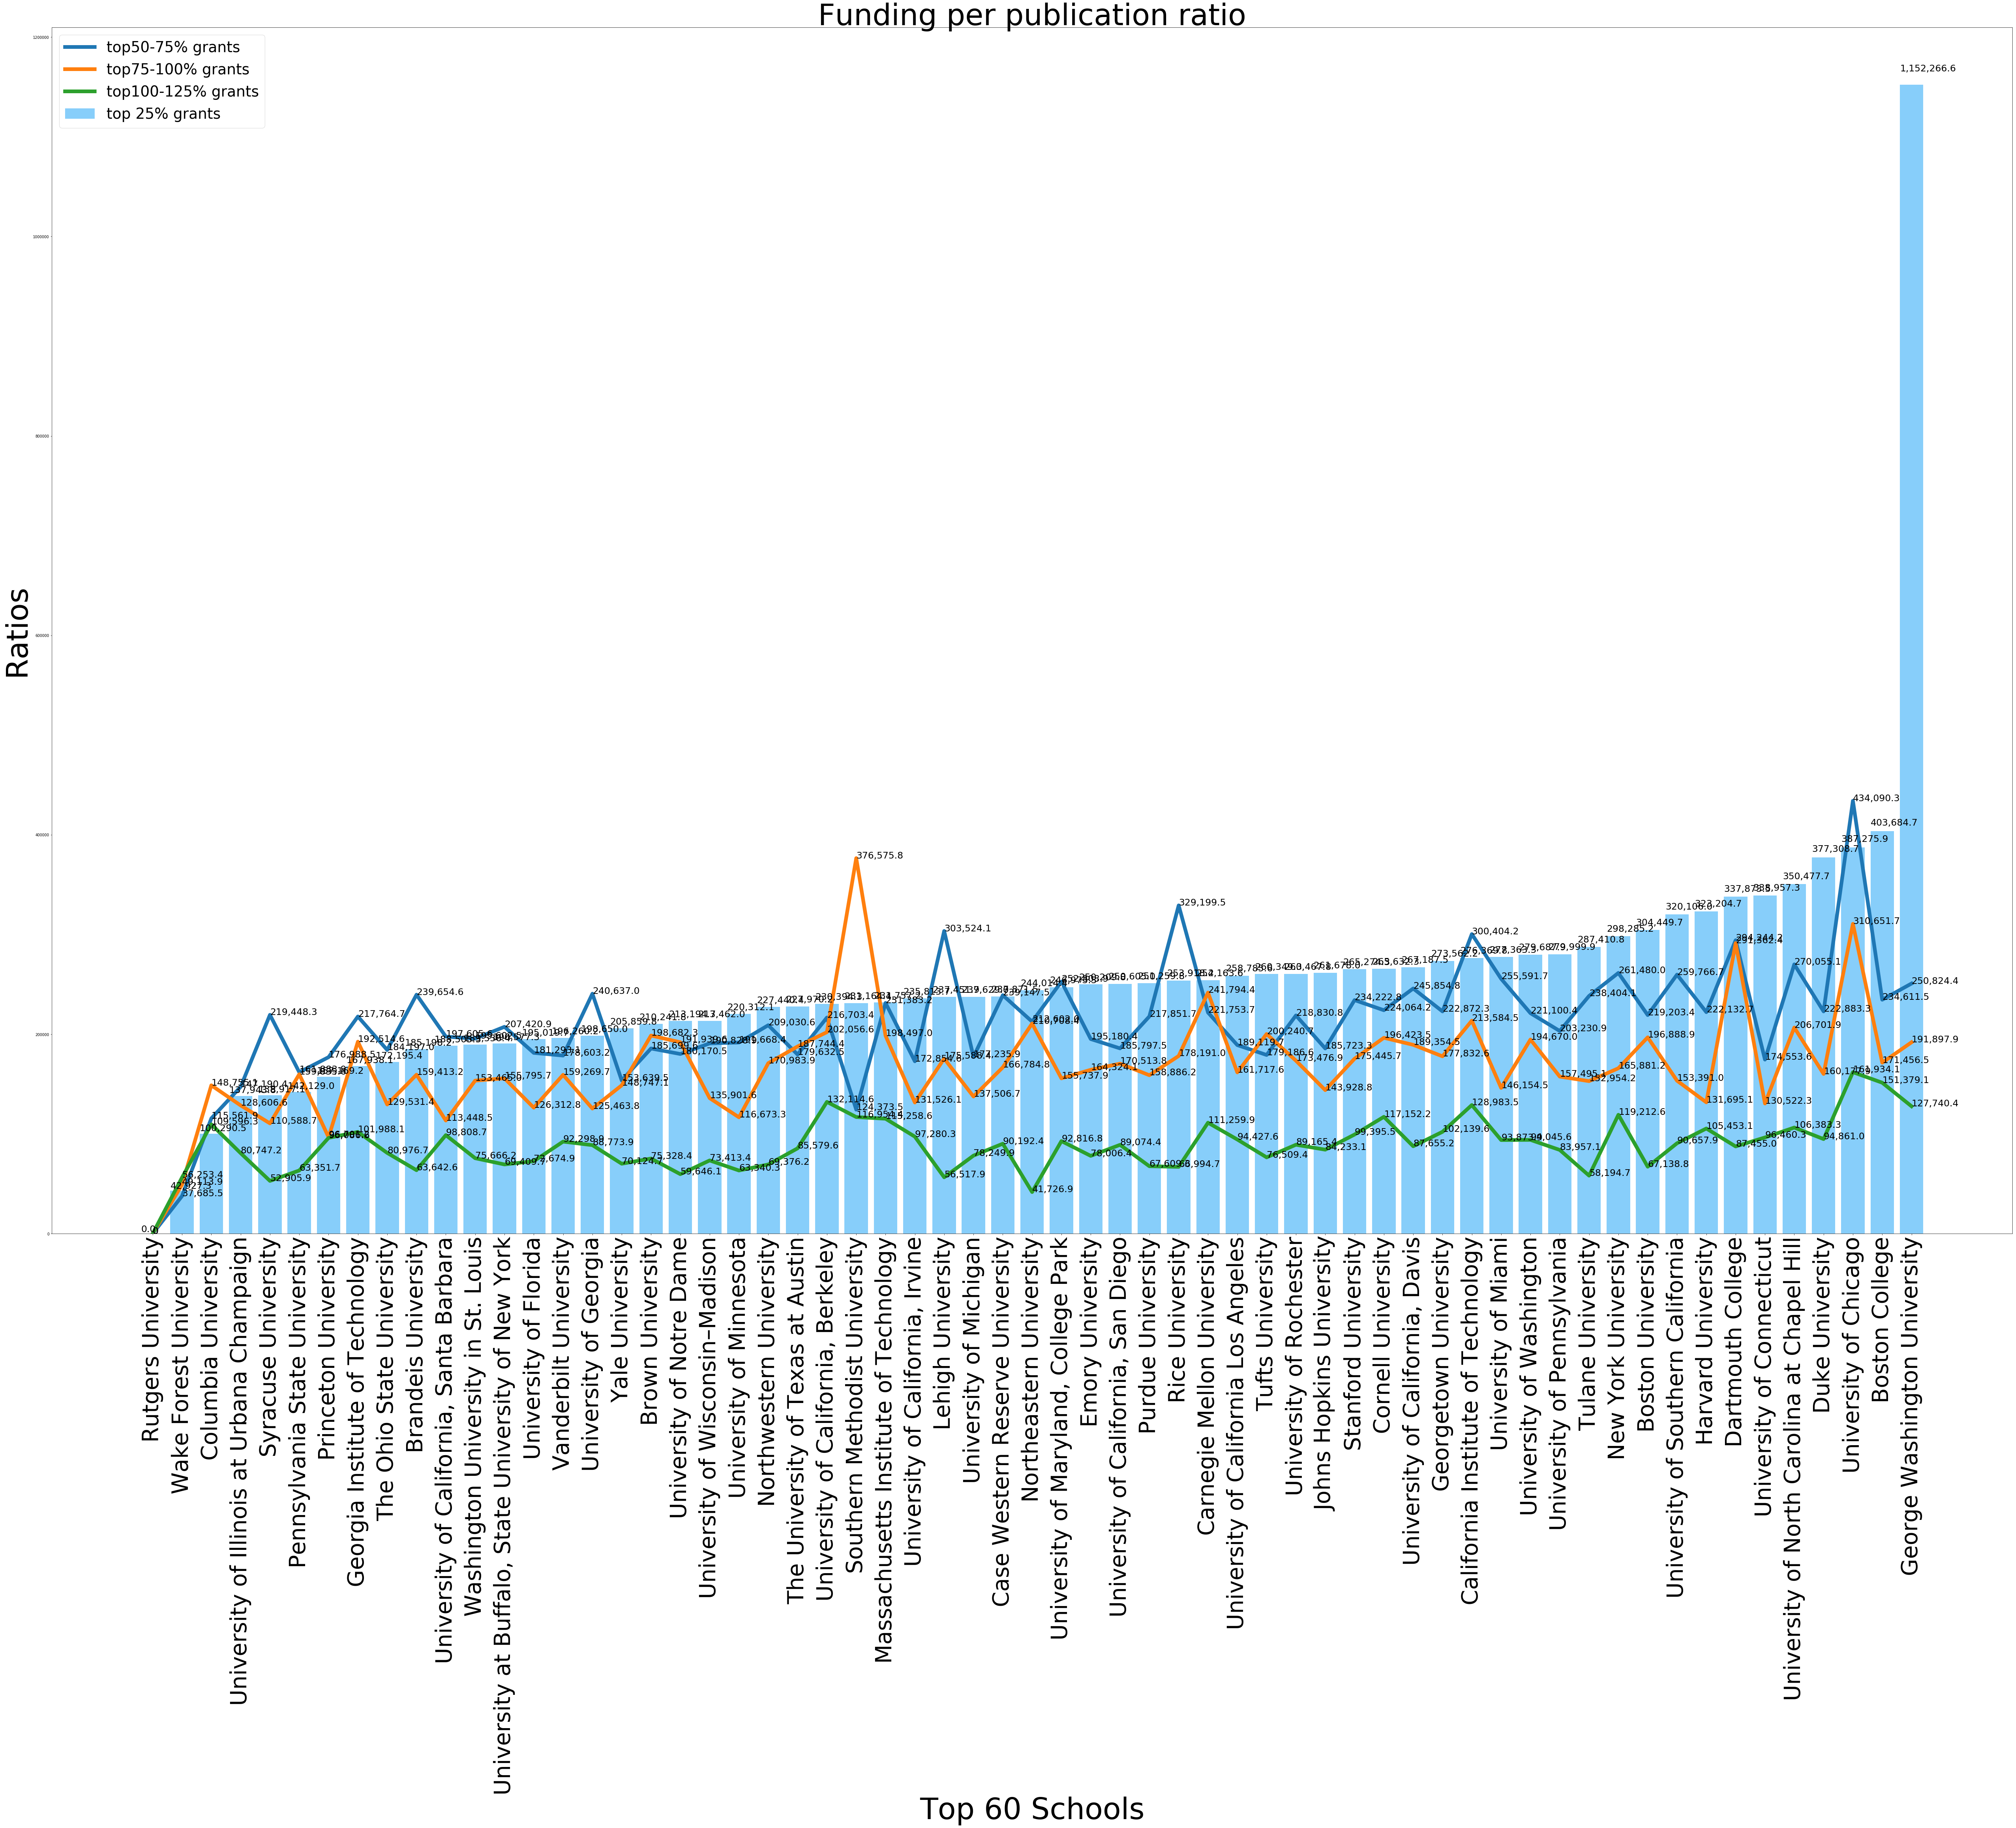

In [22]:
# 12,19 is missing, since papers is empty
FOR=11
for level in [1,2,3,4]:
    for school in ratios_by_grant[FOR][level]:
        ratios_by_grant[FOR][level][school]=ratios_by_grant[FOR][level][school]
    if level==1:
        sorted_ratio = sorted(ratios_by_grant[FOR][level].items(), key=operator.itemgetter(1))
        orderedratio = OrderedDict(sorted_ratio)
        plt.figure(figsize=(95,60))
        rects =plt.bar(range(len(orderedratio)), list(orderedratio.values()),color="lightskyblue",label="top 25% grants")
        plt.xticks(range(len(orderedratio)), list(orderedratio.keys()),rotation="vertical",fontsize=60)
        plt.xlabel('Top 60 Schools',fontsize=80)
        plt.ylabel('Ratios',fontsize=80)
        plt.title('Funding per publication ratio',fontsize=80)
        for rect in rects:
                height = rect.get_height()
                plt.text(rect.get_x() , 1.01*height,
                        '{:,}'.format(height),va='bottom',fontsize=25)       
    else:
        new=[]
        for school in orderedratio.keys():
            new.append(ratios_by_grant[FOR][level][school])
        plt.plot(range(len(orderedratio)),new,linewidth=10,label="top"+str((level)*25)+"-"+str((level+1)*25)+"% grants")
        for i,j in zip(range(len(orderedratio)),new):
            plt.annotate('{:,}'.format(j),xy=(i,j),fontsize=25)
    plt.legend(fontsize=40)

###### Processing missing data for Plotting

In [23]:
with open ('ratios_by_year', 'rb') as fp:
    ratios_by_year = pickle.load(fp)
    
for FOR in ratios_by_year:
    for i in [1998,2000,2002,2004,2006,2008,2010,2012,2014,2016,2018]:
        for school in ratios_by_year[FOR][i]:
            ratios_by_year[FOR][i][school]=round(ratios_by_year[FOR][i][school],1)
            if (math.isnan(ratios_by_year[FOR][i][school])==True) or (math.isinf(ratios_by_year[FOR][i][school])==True):
                ratios_by_year[FOR][i][school]=0


##### Plotting for Ratios by Year

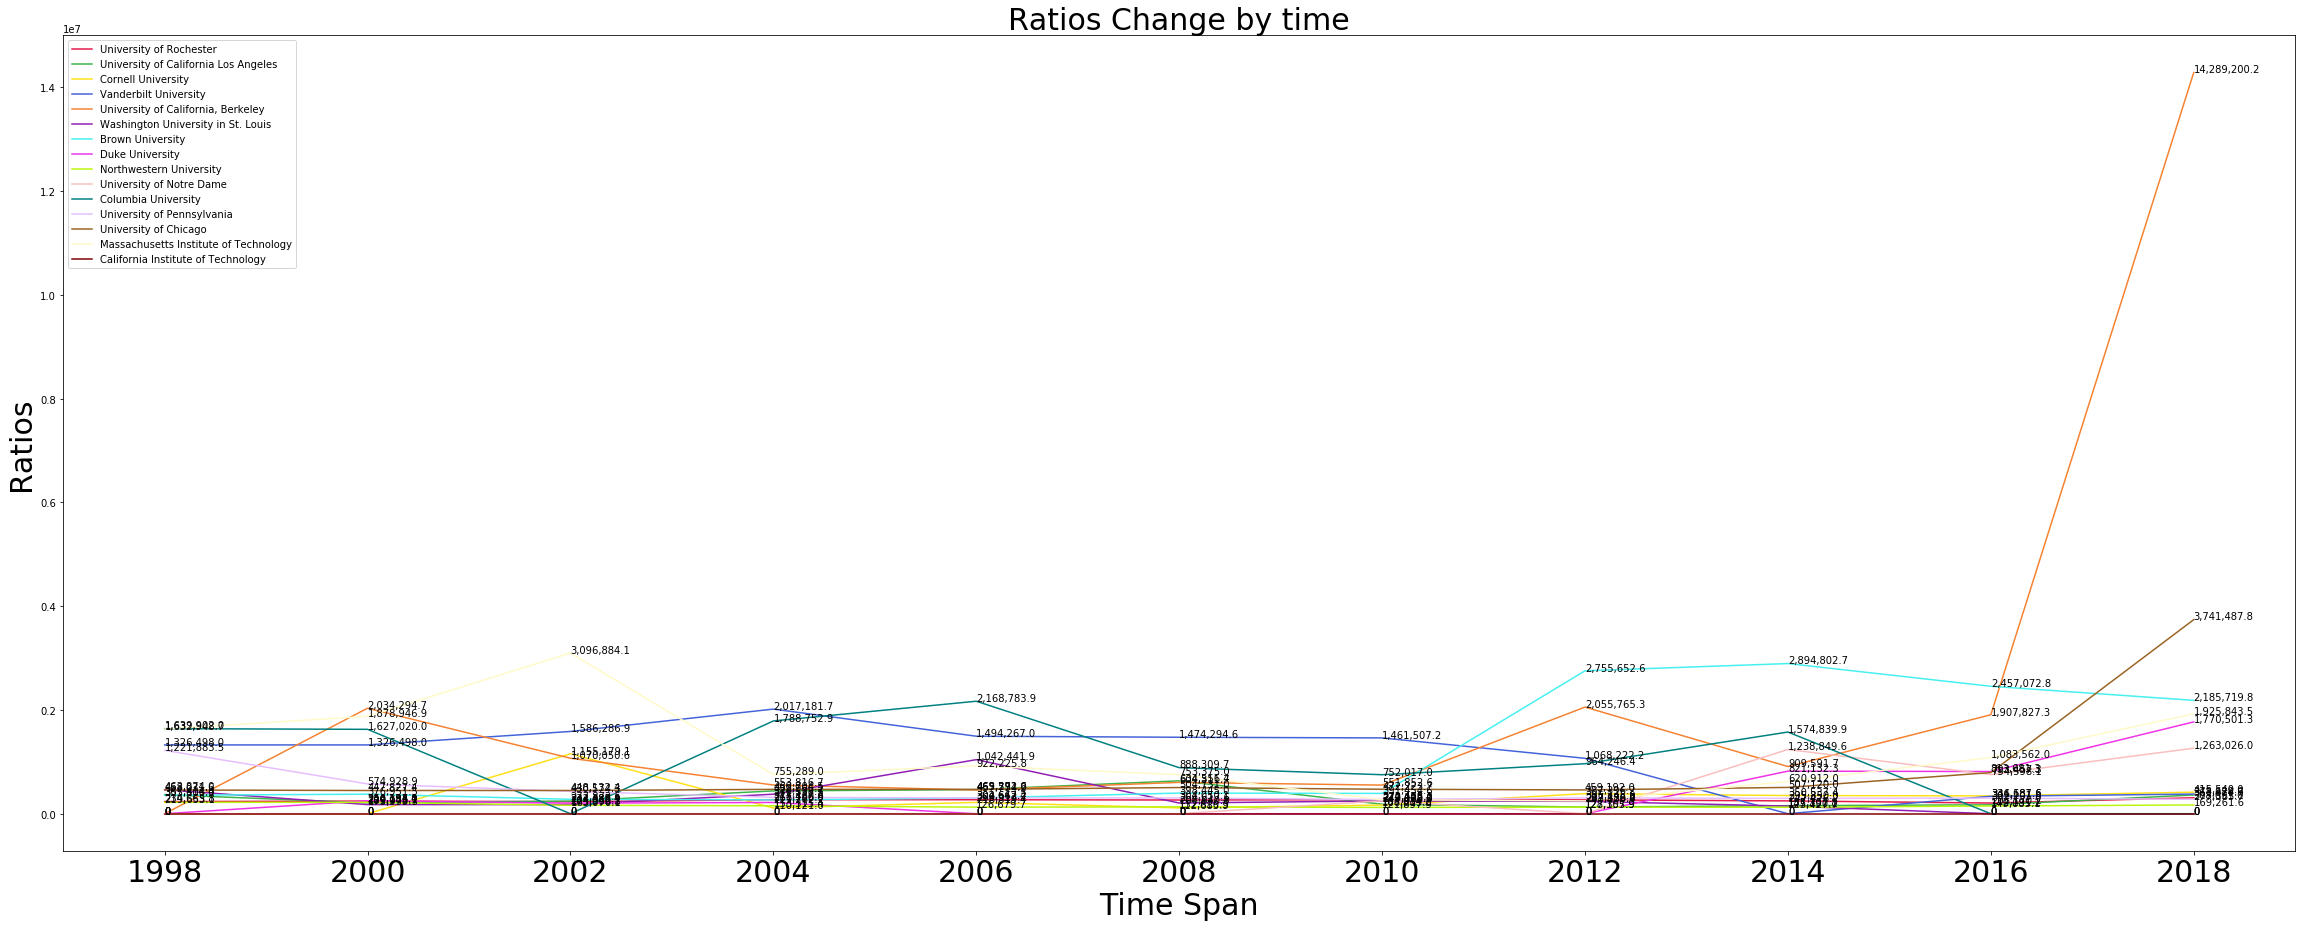

In [28]:
FOR=20
tops=schools[:15]
    
colors=['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', 
        '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', 
        '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080']    

plt.figure(figsize=(40,15))
plt.xticks(range(11), [1998,2000,2002,2004,2006,2008,2010,2012,2014,2016,2018],fontsize=30)
plt.xlabel('Time Span',fontsize=30)
plt.ylabel('Ratios',fontsize=30)
plt.title("Ratios Change by time",fontsize=30)
for index,school in enumerate(tops):
    timearray=[]
    for year in [1998,2000,2002,2004,2006,2008,2010,2012,2014,2016,2018]:
        timearray.append(ratios_by_year[FOR][year][school])
    plt.plot(range(11),timearray,label=school,color=colors[index])
    for i,j in zip(range(11),timearray):
        plt.annotate('{:,}'.format(j),xy=(i,j),fontsize=10)
    plt.legend(fontsize=10,loc="upper left")